In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pyproj
import osmnx
import shapely
from geopy import distance
import seaborn as sns

In [2]:
DaytonDf=pd.read_csv("13/Dayton.csv")
roadNetwork=osmnx.io.load_graphml("data/road.graphml")
study_area = osmnx.geocode_to_gdf("Dayton")

In [3]:
DaytonDf.columns

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
nodes, edges=osmnx.graph_to_gdfs(roadNetwork)

In [5]:
DaytonDf["start_coordinate"]=DaytonDf.apply(
    lambda x: shapely.Point(x["Start_Lng"], x["Start_Lat"]), axis=1)

In [12]:
edges['buffered_geometry'] = edges.copy()['geometry'].apply(lambda geom: geom.buffer(0.01))

In [13]:
edges["accident_count"]= edges.apply(
    lambda x: len(DaytonDf[x['buffered_geometry'].intersects(DaytonDf["start_coordinate"])]
                ),  axis=1
)

In [8]:
edges["accident_count"].value_counts

<bound method IndexOpsMixin.value_counts of u            v            key
198817433    198846074    0      11315
             198817442    0      11656
             199047720    0      11410
198817442    198872321    0      11587
             198892095    0      11605
                                 ...  
12710989821  12710989820  0       5812
12710991934  198969473    0       7207
             198872889    0       6618
             198872925    0       6631
             198969497    0       6571
Name: accident_count, Length: 14804, dtype: int64>

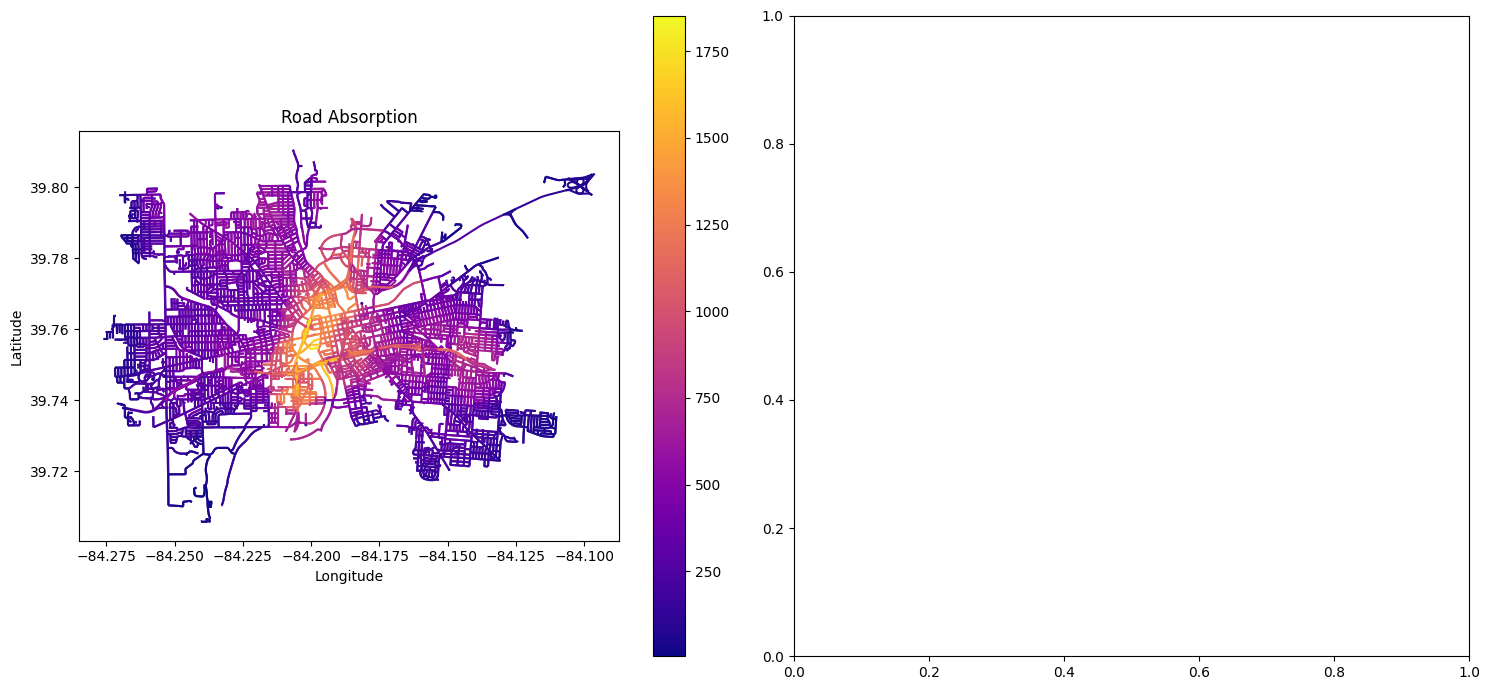

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot absorption
edges.plot(column='accident_count', cmap='plasma', legend=True, ax=axes[0])
axes[0].set_title('Road Absorption')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

ValueError: setting an array element with a sequence.

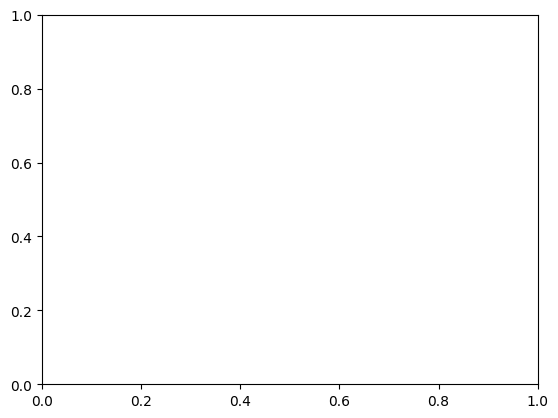

In [11]:
plt.plot(edges['buffered_geometry'])